# Итераторы и генераторы. Перегрузка операторов

## Итераторы

![](https://nvie.com/img/relationships.png)

**Вкратце:**
+ итератор - есть метод ***\_\_next\_\_()***, лениво вычисляет и возвращает следующее значение
+ итерируемый объект - есть метод ***\_\_iter\_\_()*** который возвращает итератор
+ генератор - функция с ***yield*** или выражение в круглых скобках `(i for i in range(x))`
+ контейнер - ***list, set, dict*** и т.д., все значения хранятся в памяти

In [ ]:
some_list = [i ** 2 for i in range(7)] # list comprehension

In [ ]:
for i in some_list:
    print(i)

Наверное, интерпретатор понимает, как пройтись по списку. А как он это делает?

In [ ]:
iterator = iter(some_list)

while True:
    print(next(iterator))

А если хотим сделать такое же для своих классов?

In [ ]:
# класс одновременно iterable и iterator - частое явление в питоне
class MyIntRange:
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value
        self.current_value = min_value - 1
    
    def __next__(self): # для работы метода next() - итератор
        if self.current_value >= self.max_value:
            raise StopIteration()
        
        self.current_value += 1
        return self.current_value
    
    def __iter__(self): # для работы метода iter() - итерируемый объект
        return self

In [ ]:
for i in MyIntRange(0, 7):
    print(i)

In [ ]:
# то же самое, но итератор отдельно от итерируемого объекта
class MyIntRange:
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value
        
    def __iter__(self): # для работы метода iter() - итерируемый объект
        return MyIntIterator(self.min_value, self.max_value)
    
class MyIntIterator:
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value
        self.current_value = min_value - 1
        
    def __next__(self): # для работы метода next() - итератор
        if self.current_value >= self.max_value:
            raise StopIteration()
        
        self.current_value += 1
        return self.current_value

In [ ]:
for i in MyIntRange(0, 7):
    print(i)

Итераторы позволяют единообразно обращаться к разным коллекциям. 

In [ ]:
for i in set([1, 2, 3, 4, 1, 2, 3, 4]):
    print(i)

In [ ]:
for i in dict(x=1, y=2, z=3):
    print(i)

## Генераторы

Чтобы не писать простыни с `__next__` и  `__item__`, существуют генераторы.

In [ ]:
# generator function
def my_int_generator(a, b):
    while a <= b:
        yield a
        a += 1

In [ ]:
for i in my_int_generator(0, 7): 
    print(i)

`my_int_generator(0, 7)`  вернёт нам объект-генератор. Весь код сразу исполняться не будет.

In [ ]:
def my_int_generator(a, b):
    print('Enter')
    while a <= b:
        print('Yielding %d' % a)
        yield a
        a += 1
    print('Exit')

In [ ]:
generator = my_int_generator(0, 1)
print(generator)
print(type(generator))
print('А теперь попробуем пройтись по итератору')
print(next(generator))
print(next(generator))
print(next(generator))

In [ ]:
for i in my_int_generator(0, 2):
    print(i)

In [ ]:
# generator expression 
exp_generator = (i for i in range(7))
print(next(exp_generator))
print(next(exp_generator))

Код функции-генератора приостанавливает выполнение на инструкции yield и продолжает исполнение, когда мы запрашиваем следующий элемент.

Итераторы (и генераторы) полезны, например, когда мы обрабатываем очень большой файл или скачиваем большую таблицу из базы данных. Если данные целиком не помещаются в память, приходится считывать и обрабатывать их кусками, что удобно делать с помощью итераторов.

## Перегрузка операторов

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
some_point = Point(0, 1)
another_point = Point(0, 1)
print(some_point == another_point)

Ну куда это годится? Научим экземпляры класса сравнивать себя с другими объектами!

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [ ]:
some_point = Point(0, 1)
another_point = Point(0, 1)
print(some_point == another_point)

Можно перегружать и другие операторы сравнения [(см. тут)](https://docs.python.org/3/reference/datamodel.html#object.__lt__)

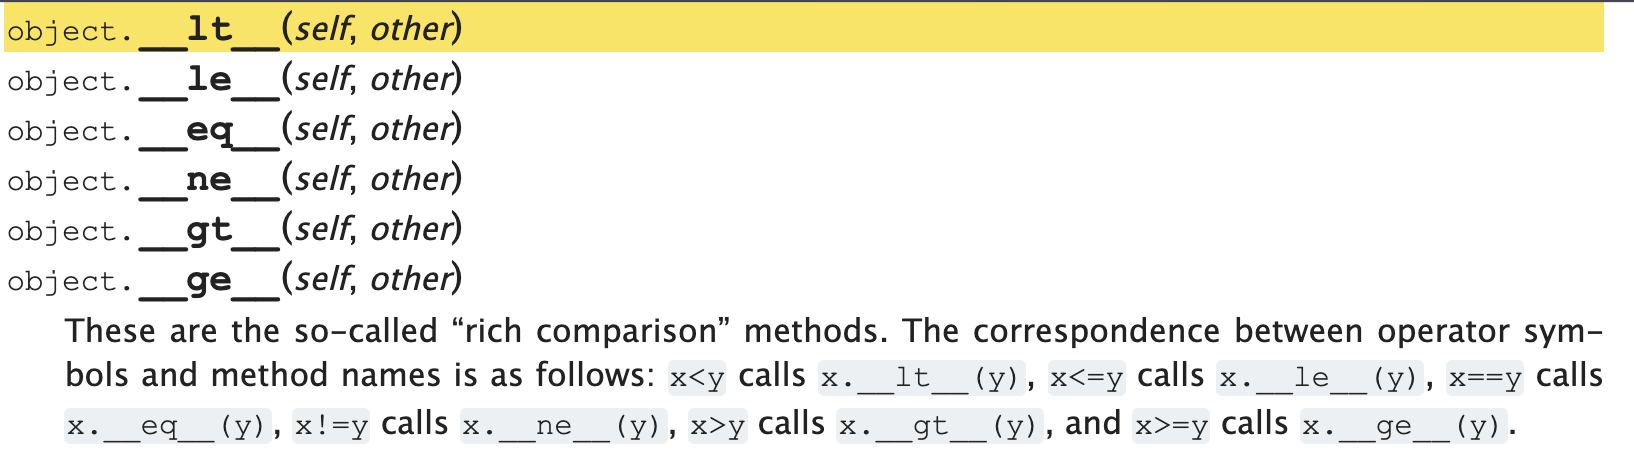

Или даже арифметические операторы:

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __repr__(self):
        return '<Point(%s, %s)>' % (self.x, self.y)
    
    def __bool__(self):
        return self.x != 0 and self.y != 0

In [ ]:
Point(1, 2) + Point(-1, 2)

[(источник)](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types)

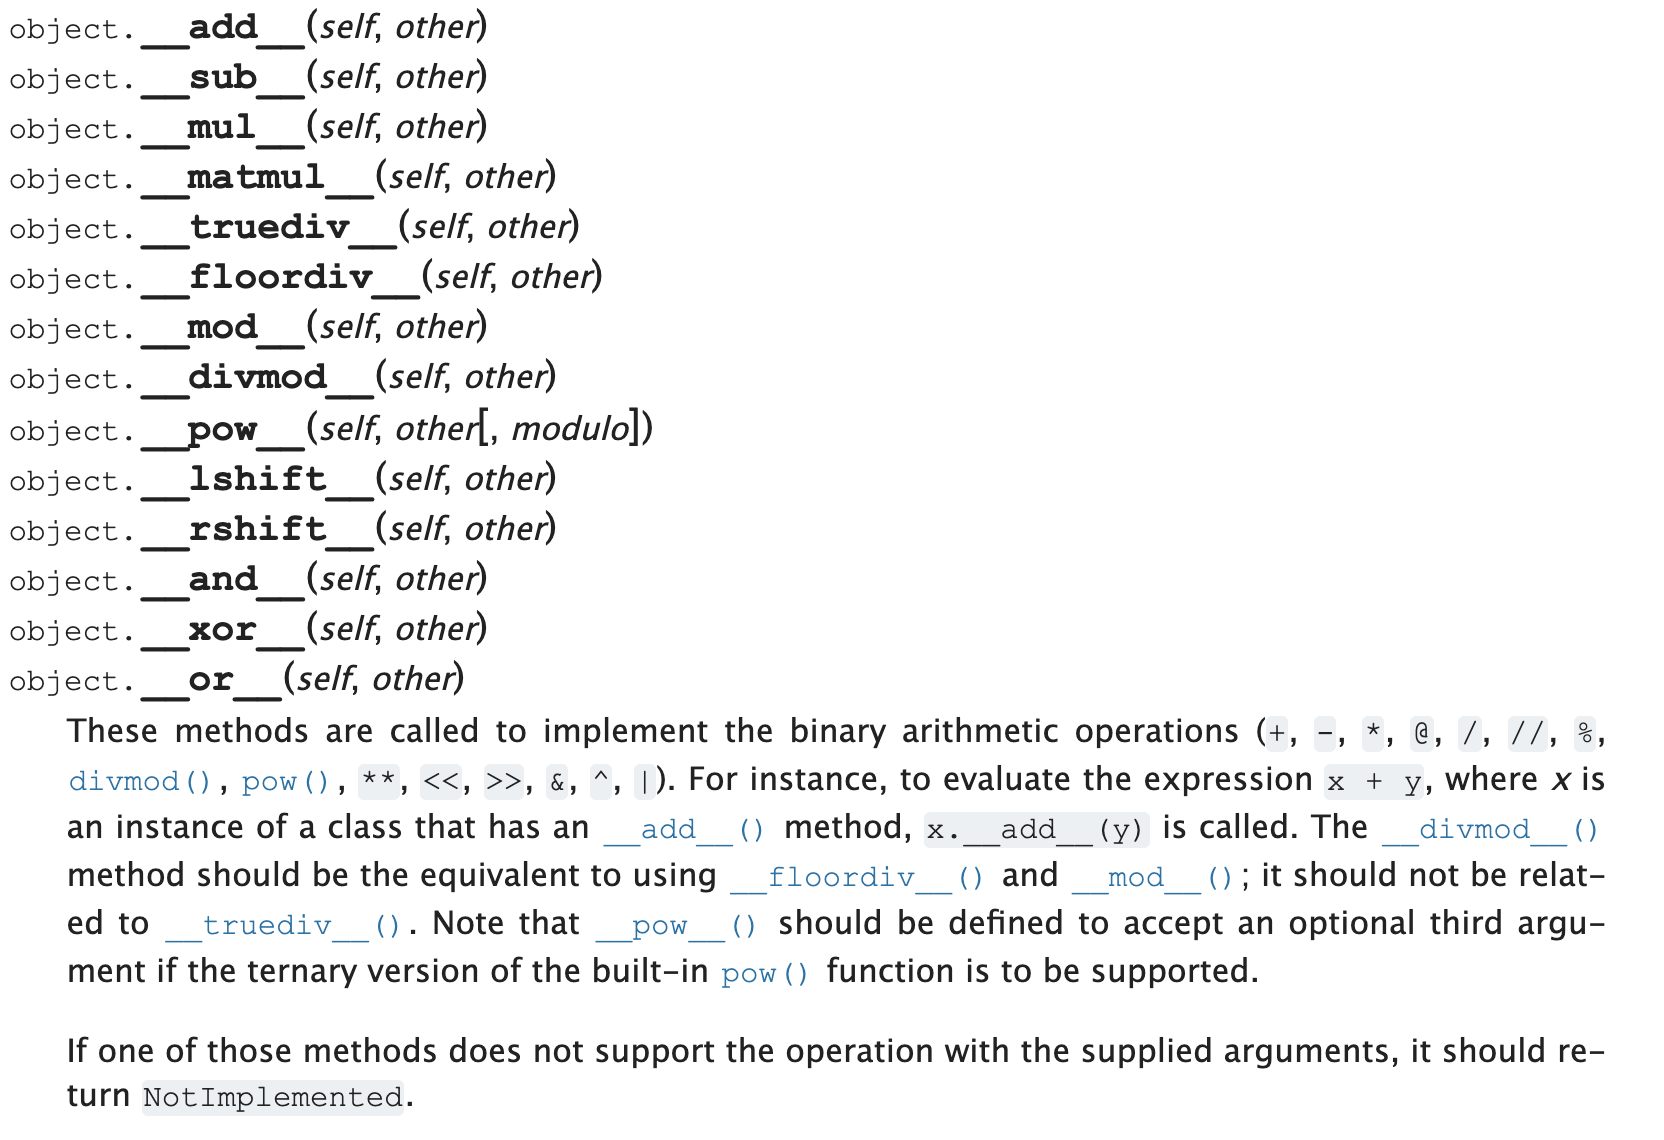

In [ ]:
class Negative:
    def __eq__(self, other):
        if other is self:
            return True
        return not other

In [ ]:
neg = Negative()

In [ ]:
neg == None

In [ ]:
neg is None

**Задание 1**
+ Есть функция filter (а что она делает?). Напишите функцию anti_filter, который возвращает генератор со значениями, для которых функция возвращает False

**Задание 2**:
+ Нужно написать класс Sentence, конструктор котрого получает на вход предложение.
+ Класс должен быть iterable, итерация по словам предложения. 
+ Экземпляры должно быть можно сравнивать между собой стандартными операторами в питоне, сравнение больше-меньше происходит по длине предложения в словах, предложения равны, если все слова в них и порядок слов совпадают. 

## Ещё почитать

* про генераторы: https://habr.com/ru/post/132554/
* iterators vs generators: https://nvie.com/posts/iterators-vs-generators/
* встроенная функция `zip`: https://www.w3schools.com/python/ref_func_zip.asp
* `itertools` - полезные функции для работы с итераторами: https://medium.com/@jasonrigden/a-guide-to-python-itertools-82e5a306cdf8 https://docs.python.org/3/library/itertools.html